## Assignment

### Part I

#### Clean your data

+ Read in temp_data.txt
    + It won't be easy! You'll need to find a way to clean the data
    + Try opening the file in a text editor first
+ Read in temp_X.csv
+ Merge the X variable from temp_X with the data from temp_data
+ Note that we discussed this in class, but it's something you'll just need to practice on your own. 
+ You will struggle with this and it's ok
+ Check out the documentation for read_csv() in the pandas package


### Part II

#### Run a linear regression
+ Using X to predict temperature 
+ Interpret your coefficients!
+ What is one potential use for this linear regression equation? 
+ What does this linear regression mean? 
+ Is this a good model? Why or why not? 

    


In [123]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

In [124]:
temp = pd.read_csv(filepath_or_buffer='C:\Users\Lauren\GA\sfdat32\sfdat32\Homework/temp_data_mod.txt',sep='\t')

In [125]:
temp.head()

,Fahrenheit Station ID,Series Number,Date,Temperature (C),Uncertainty (C),Observations,Time of Observation
0,25398,1,1986.708,26.611,0.0507,30,24
1,25398,1,1986.875,27.593,0.0507,30,24
2,25398,1,1986.958,28.226,0.0499,31,24
3,25398,1,1987.042,27.581,0.0499,31,24
4,25398,1,1987.125,27.996,0.0525,28,24


In [126]:
tempx = pd.read_csv(filepath_or_buffer='C:\Users\Lauren\GA\sfdat32\sfdat32\Homework/temp_X.csv')

In [127]:
temp.shape

(141637, 7)

In [128]:
tempx.head()

,Unnamed: 0,Station_ID,Series_Number,Date,X
0,0,25398,1,1986.708,79.8998
1,1,25398,1,1986.875,81.6674
2,2,25398,1,1986.958,82.8068
3,3,25398,1,1987.042,81.6458
4,4,25398,1,1987.125,82.3928


In [129]:
tempx.shape

(141637, 5)

In [130]:
temp.rename(columns={'Fahrenheit Station ID':'Station_ID'},inplace=True)

In [131]:
temp.rename(columns={'Temperature (C)':'Temperature_C'},inplace=True)

In [132]:
temp.head()

,Station_ID,Series Number,Date,Temperature_C,Uncertainty (C),Observations,Time of Observation
0,25398,1,1986.708,26.611,0.0507,30,24
1,25398,1,1986.875,27.593,0.0507,30,24
2,25398,1,1986.958,28.226,0.0499,31,24
3,25398,1,1987.042,27.581,0.0499,31,24
4,25398,1,1987.125,27.996,0.0525,28,24


In [133]:
temp.shape

(141637, 7)

In [134]:
tempx.head()

,Unnamed: 0,Station_ID,Series_Number,Date,X
0,0,25398,1,1986.708,79.8998
1,1,25398,1,1986.875,81.6674
2,2,25398,1,1986.958,82.8068
3,3,25398,1,1987.042,81.6458
4,4,25398,1,1987.125,82.3928


In [135]:
tempx.shape

(141637, 5)

In [136]:
tempmerge=pd.merge(temp,tempx,how='left',on=['Station_ID','Date'])

In [137]:
tempmerge.head()

,Station_ID,Series Number,Date,Temperature_C,Uncertainty (C),Observations,Time of Observation,Unnamed: 0,Series_Number,X
0,25398,1,1986.708,26.611,0.0507,30,24,0,1,79.8998
1,25398,1,1986.875,27.593,0.0507,30,24,1,1,81.6674
2,25398,1,1986.958,28.226,0.0499,31,24,2,1,82.8068
3,25398,1,1987.042,27.581,0.0499,31,24,3,1,81.6458
4,25398,1,1987.125,27.996,0.0525,28,24,4,1,82.3928


In [138]:
tempmerge.shape

(141637, 10)

In [139]:
import statsmodels.formula.api as smf

X = tempmerge[['X']]
y = tempmerge['Temperature_C']

lm = smf.ols(formula='y ~ X', data=tempmerge).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.065e+34
Date:                Wed, 08 Mar 2017   Prob (F-statistic):               0.00
Time:                        18:41:01   Log-Likelihood:             3.8040e+06
No. Observations:              141637   AIC:                        -7.608e+06
Df Residuals:                  141635   BIC:                        -7.608e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -17.7778   1.43e-15  -1.24e+16      0.000       -17.778   -17.778
X              0.5556   5.38e-18   1.03e+17      0.000         0.556     0.556
==============================================================================
Omnibus:                   492575.068   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     125712693189.314
Skew:                         -67.272   Prob(JB):                         0.00
Kurtosis:                    4616.412   Cond. No.                         273.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

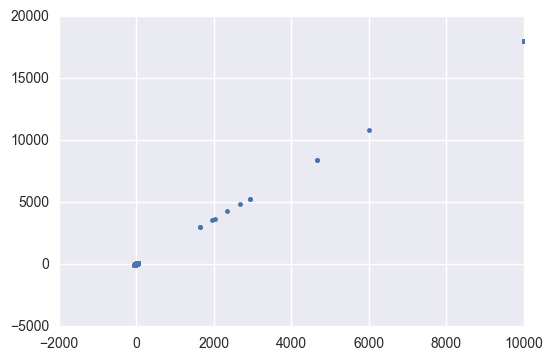

In [140]:
plt.plot(tempmerge.Temperature_C,tempmerge.X, '.')

In [141]:
X_new = pd.DataFrame({'X': [0,65,98.6,212]})
X_new

,X
0,0.0
1,65.0
2,98.6
3,212.0


In [142]:
lm.predict(X_new)
print X_new

       X
0    0.0
1   65.0
2   98.6
3  212.0


#### Interperet your coefficients
The coeficient "0.5556" is 'C/'F, and is basically the conversion coefficient to convert 'C to 'F
The intercept of -17.7777 is in units of 'C. In other words, when 'F=0, 'C=-17.777


#### What is one potential use for these coefficients?
Converting 'F to 'C or vice versa.


#### What does this linear regression mean?
There is a perfect linear relationship between the Fahrenheit and Celsius temperature scales.


#### Is this a good model? Why or why not?
Yes - R^2 is one. There is a perfect linear fit for the relationship between Temp X ('F) and Temperature 'C. This is also evident in the fact that predicted values are identical to the original values.
